Name: Ashwini Giri USC ID: 5413882039

# Tree-Based Methods

(a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks# . The dataset contains a training set and a
test set. The training set contains 60,000 rows, of which 1,000 belong to the pos-
itive class and 171 columns, of which one is the class column. All attributes are numeric.

The dataset is available on the UCI repository. The dataset contains missing values and they are represented by 'na'. Hence passing na_values attribute while reading the csv file into a dataframe.

Below are the imports used for the entire problem.

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import operator
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import itertools
from collections import Counter
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [174]:
training_dataframe = pd.read_csv('aps_failure_training_set.csv',skiprows=20,na_values=['na'])
testing_dataframe = pd.read_csv('aps_failure_test_set.csv',skiprows=20,na_values = ['na'])

In [175]:
training_dataframe.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [176]:
testing_dataframe.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


The training data is stored in the training_dataframe and the testing data is stored in the testing_dataframe. The response class has two categorical classes namely negative - 'neg' and positive - 'pos'.

(b) Data Preparation
This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.


i. Research what types of techniques are usually used for dealing with data with missing values.1 Pick at least one of them and apply it to this data in the next steps.2

Types of techniques used for dealing with data with missing values:

Techniques

I. Deletion

Unless the nature of missing data is ‘Missing completely at random’, the best avoidable method in many cases is deletion.

a. Listwise: In this case, rows containing missing variables are deleted.

In the above case, the entire observation for User A and User C will be ignored for listwise deletion

b. Pairwise: In this case, only the missing observations are ignored and analysis is done  on  variables present.

Both the above methods suffer from loss of information. Listwise deletion suffers the maximum information loss compared to Pairwise deletion. But, the problem with pairwise deletion is that even though it takes the available cases, one can’t compare analyses because the sample is different every time.

II. Imputation

a. Popular Averaging Techniques

Mean, median and mode are the most popular averaging techniques, which are used to infer missing values. Approaches ranging from global average for the variable to averages based on groups are usually considered.

Though we can get a quick estimate of the missing values, we are artificially reducing the variation in the dataset as the missing observations could have the same value. This may impact the statistical analysis of the dataset since depending on the percentage of missing observations imputed, metrics such as mean, median, correlation, etc may get affected.

b. Predictive Techniques

Imputation of missing values from predictive techniques assumes that the nature of such missing observations are not observed completely at random and the variables chosen to impute such missing observations have some relationship with it, else it could yield imprecise estimates.
This method uses predictive models like Decision Trees and Linear Regression to impute missing values.

since there are many missing values hence using 'mean' to impute the missing values

In the below code I am splitting the dataframe to seperate the train data and the train labels as well as the test data and the test labels. The train data is saved in the training_dataframe, test in testing_dataframe, train labels in training_dataframe_label and test labels in testing_dataframe_label.

In [177]:
dfs = np.split(training_dataframe,[1],axis=1)
training_dataframe = dfs[1]
training_dataframe_label = dfs[0]

dfs_test = np.split(testing_dataframe,[1],axis=1)
testing_dataframe = dfs_test[1]
testing_dataframe_label = dfs_test[0]

In [178]:
training_dataframe.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.13071e+09,280,0,0,0,0,0,0,...,1.24052e+06,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,NaN,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,NaN,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,NaN,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [179]:
training_dataframe_label.head()

,class
0,neg
1,neg
2,neg
3,neg
4,neg


In [180]:
testing_dataframe.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0,20,12,0,0,0,0,0,2682,...,1098,138,412,654,78,88,0,0,0,0
1,82,0,68,40,0,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,66002,2,212,112,0,0,0,0,0,199486,...,495076,380368,440134,269556,1.31502e+06,153680,516,0,0,0
3,59816,NaN,1010,936,0,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,1814,NaN,156,140,0,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [181]:
testing_dataframe_label.head()

,class
0,neg
1,neg
2,neg
3,neg
4,neg


In the below code calculating mean for each predictor for the test and train data. They are stored in variables mean_values_train and mean_values_test.

In [182]:
mean_values_train = []
mean_values_test = []
for col in training_dataframe.columns:
    mean = training_dataframe[col].mean()
    mean_values_train.append(mean)
    
for col in testing_dataframe.columns:
    mean = testing_dataframe[col].mean()
    mean_values_test.append(mean)

In [183]:
print(mean_values_train)
print('********************************************************************************************************')
print(mean_values_test)

[59336.499566666665, 0.7131885012069343, 356014263.03146565, 190620.6393141186, 6.8191304347826085, 11.006817391304347, 221.63636670093882, 975.7222606145392, 8606.014529151005, 88591.28109356301, 437096.63237202715, 1108373.8302685027, 1657817.886227646, 499309.80417670956, 35569.89108193295, 5114.75315612938, 1809931.1761098476, 9016.96542082835, 1143.6747907227434, 979.489964028777, 59130.47558880016, 93281.33182867056, 3461037.0434987703, 3002440.306946525, 1004159.5569594663, 442404.46432478837, 0.49691848385914067, 126.7365211972175, 5072.046285223426, 230.58038436273603, 1117.8259130434783, 374.3273796066019, 12211.647996763808, 10190.118795192908, 10974.997994235535, 7225.783883092586, 10566.000404523926, 111979.11395776096, 1078551.1991437576, 1546032.3613747072, 1051122.964047936, 1162.6216184328068, 7849.607679212527, 4420.992364610898, 8066.08151157107, 87240.8187227157, 1476896.662239377, 2135583.8578435504, 101894.25785029244, 17377.817188895817, 661.7861416845051, 42.073

In the below code replacing the missing values with mean values.

In [185]:
training_col = training_dataframe.columns
for i in range(0,len(mean_values_train)):
    training_dataframe[training_col[i]] = training_dataframe[training_col[i]].fillna(mean_values_train[i])

testing_col = testing_dataframe.columns
for i in range(0,len(mean_values_test)):
    testing_dataframe[testing_col[i]] = testing_dataframe[testing_col[i]].fillna(mean_values_test[i])

In [186]:
training_dataframe.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [187]:
testing_dataframe.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0.000000,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82,0.000000,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002,2.000000,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816,0.772065,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814,0.772065,156.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


Checking if there are any missing values left after imputation. If There are any present then imputation should be done again. We are checking this by calculating number of 'NA' values in the dataframe.

In [188]:
training_dataframe.isnull().sum()

aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
ag_000    0
ag_001    0
ag_002    0
ag_003    0
ag_004    0
ag_005    0
ag_006    0
ag_007    0
ag_008    0
ag_009    0
ah_000    0
ai_000    0
aj_000    0
ak_000    0
al_000    0
am_0      0
an_000    0
ao_000    0
ap_000    0
aq_000    0
ar_000    0
as_000    0
at_000    0
au_000    0
         ..
dl_000    0
dm_000    0
dn_000    0
do_000    0
dp_000    0
dq_000    0
dr_000    0
ds_000    0
dt_000    0
du_000    0
dv_000    0
dx_000    0
dy_000    0
dz_000    0
ea_000    0
eb_000    0
ec_00     0
ed_000    0
ee_000    0
ee_001    0
ee_002    0
ee_003    0
ee_004    0
ee_005    0
ee_006    0
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

In [189]:
testing_dataframe.isnull().sum()

aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
ag_000    0
ag_001    0
ag_002    0
ag_003    0
ag_004    0
ag_005    0
ag_006    0
ag_007    0
ag_008    0
ag_009    0
ah_000    0
ai_000    0
aj_000    0
ak_000    0
al_000    0
am_0      0
an_000    0
ao_000    0
ap_000    0
aq_000    0
ar_000    0
as_000    0
at_000    0
au_000    0
         ..
dl_000    0
dm_000    0
dn_000    0
do_000    0
dp_000    0
dq_000    0
dr_000    0
ds_000    0
dt_000    0
du_000    0
dv_000    0
dx_000    0
dy_000    0
dz_000    0
ea_000    0
eb_000    0
ec_00     0
ed_000    0
ee_000    0
ee_001    0
ee_002    0
ee_003    0
ee_004    0
ee_005    0
ee_006    0
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

ii. For each of the 170 features, calculate the coefficient of variation CV = s/m,
  where s is sample variance and m is sample mean.

The coefficient of variation is defined as a fraction of the sample standard deviation to the sample mean. Calculating the coefficient of variation for each feature by the formula CV=s/m. The coefficient of variation is stored in a dictionary where key is the name of the feature and value is the coefficient of variation. The variable cv_dict is used for the dictionary.

In [190]:
cv_list = []
cv_dict = {}
for col in training_col:
    cv = training_dataframe[col].std()/training_dataframe[col].mean()
    cv_list.append(cv)
    cv_dict[col] = cv

In [192]:
cv_dict

{'aa_000': 2.450937577943998,
 'ab_000': 2.3283999870318435,
 'ac_000': 2.169766523276966,
 'ad_000': 183.84762036900082,
 'ae_000': 23.190936665578853,
 'af_000': 18.658921096017636,
 'ag_000': 91.87856462936738,
 'ag_001': 34.854950077721575,
 'ag_002': 17.369143404889634,
 'ag_003': 8.550049026704684,
 'ag_004': 5.401478695421808,
 'ag_005': 2.9270920824257813,
 'ag_006': 2.3449270703375973,
 'ag_007': 2.8334840909357935,
 'ag_008': 6.1545830785515525,
 'ag_009': 32.98435104133622,
 'ah_000': 2.3001872486143227,
 'ai_000': 18.01268174446153,
 'aj_000': 43.80182238271878,
 'ak_000': 74.5266879586007,
 'al_000': 9.074370822656968,
 'am_0': 9.058671606113235,
 'an_000': 2.2387967743803063,
 'ao_000': 2.260149116812668,
 'ap_000': 3.059164306638844,
 'aq_000': 2.839611693365452,
 'ar_000': 10.837049702204823,
 'as_000': 86.41690384051536,
 'at_000': 23.4594247908152,
 'au_000': 68.1605540126918,
 'av_000': 5.778784910088061,
 'ax_000': 3.87756833864513,
 'ay_000': 37.009562327062504,
 '

iii. Plot a correlation matrix for your features using pandas or any other tool.

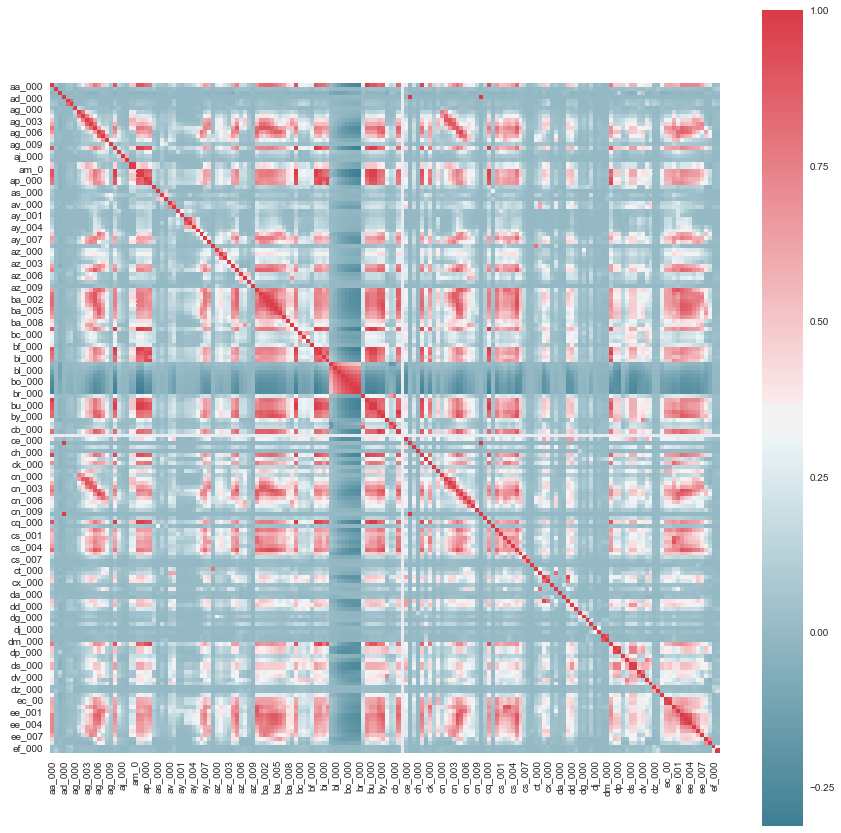

In [114]:
f, ax = plt.subplots(figsize=(15, 15))
corr = training_dataframe.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots
 for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots?

In the below code sorting the dictionary on values, that means sorting the dictionary based on coefficient of validation in ascending order. I am doing this because we need to Pick ⌊ 170⌋ features with highest CV.

In [195]:
sorted_cv_dict = sorted(cv_dict.items(), key=operator.itemgetter(1))
sorted_cv_dict

[('cd_000', 0.0),
 ('br_000', 0.38266897631364816),
 ('bq_000', 0.3991915010746177),
 ('bp_000', 0.4259665526645465),
 ('bo_000', 0.46256369320133955),
 ('bn_000', 0.5170606228668952),
 ('bm_000', 0.5947258220906063),
 ('bk_000', 0.731378375865354),
 ('bl_000', 0.73357150175634),
 ('ca_000', 0.9035040103969598),
 ('cb_000', 0.9051051395882678),
 ('bs_000', 1.0452876409160188),
 ('dc_000', 1.6386763639093962),
 ('cv_000', 1.6653358073482392),
 ('cs_000', 1.8716391711568066),
 ('dp_000', 1.9593936554528664),
 ('do_000', 2.0993554539547485),
 ('cs_006', 2.1284775523174093),
 ('dt_000', 2.143945284322684),
 ('ac_000', 2.169766523276966),
 ('ce_000', 2.173283960953867),
 ('ed_000', 2.2258247899687995),
 ('an_000', 2.2387967743803063),
 ('ao_000', 2.260149116812668),
 ('ds_000', 2.2688657333506534),
 ('bg_000', 2.297835741090436),
 ('ah_000', 2.3001872486143227),
 ('ab_000', 2.3283999870318435),
 ('cn_005', 2.331444431651778),
 ('ag_006', 2.3449270703375973),
 ('ec_00', 2.380228835988021),
 

In the below code calculating the square root of 170 and then picking 13 features with highest coefficient of variation. The feature names for these 13 features are stored in list type variable 'columns_highest_cv.

In [196]:
root_val = math.sqrt(170)
root_val = math.floor(root_val)
columns_highest_cv=[]
for i in range(0,root_val):
    columns_highest_cv.append(sorted_cv_dict[i][0])
print(columns_highest_cv)

['cd_000', 'br_000', 'bq_000', 'bp_000', 'bo_000', 'bn_000', 'bm_000', 'bk_000', 'bl_000', 'ca_000', 'cb_000', 'bs_000', 'dc_000']


In the below code making scatter plots for the features with highest CV. I am using seaborn package to make the scatter plots.

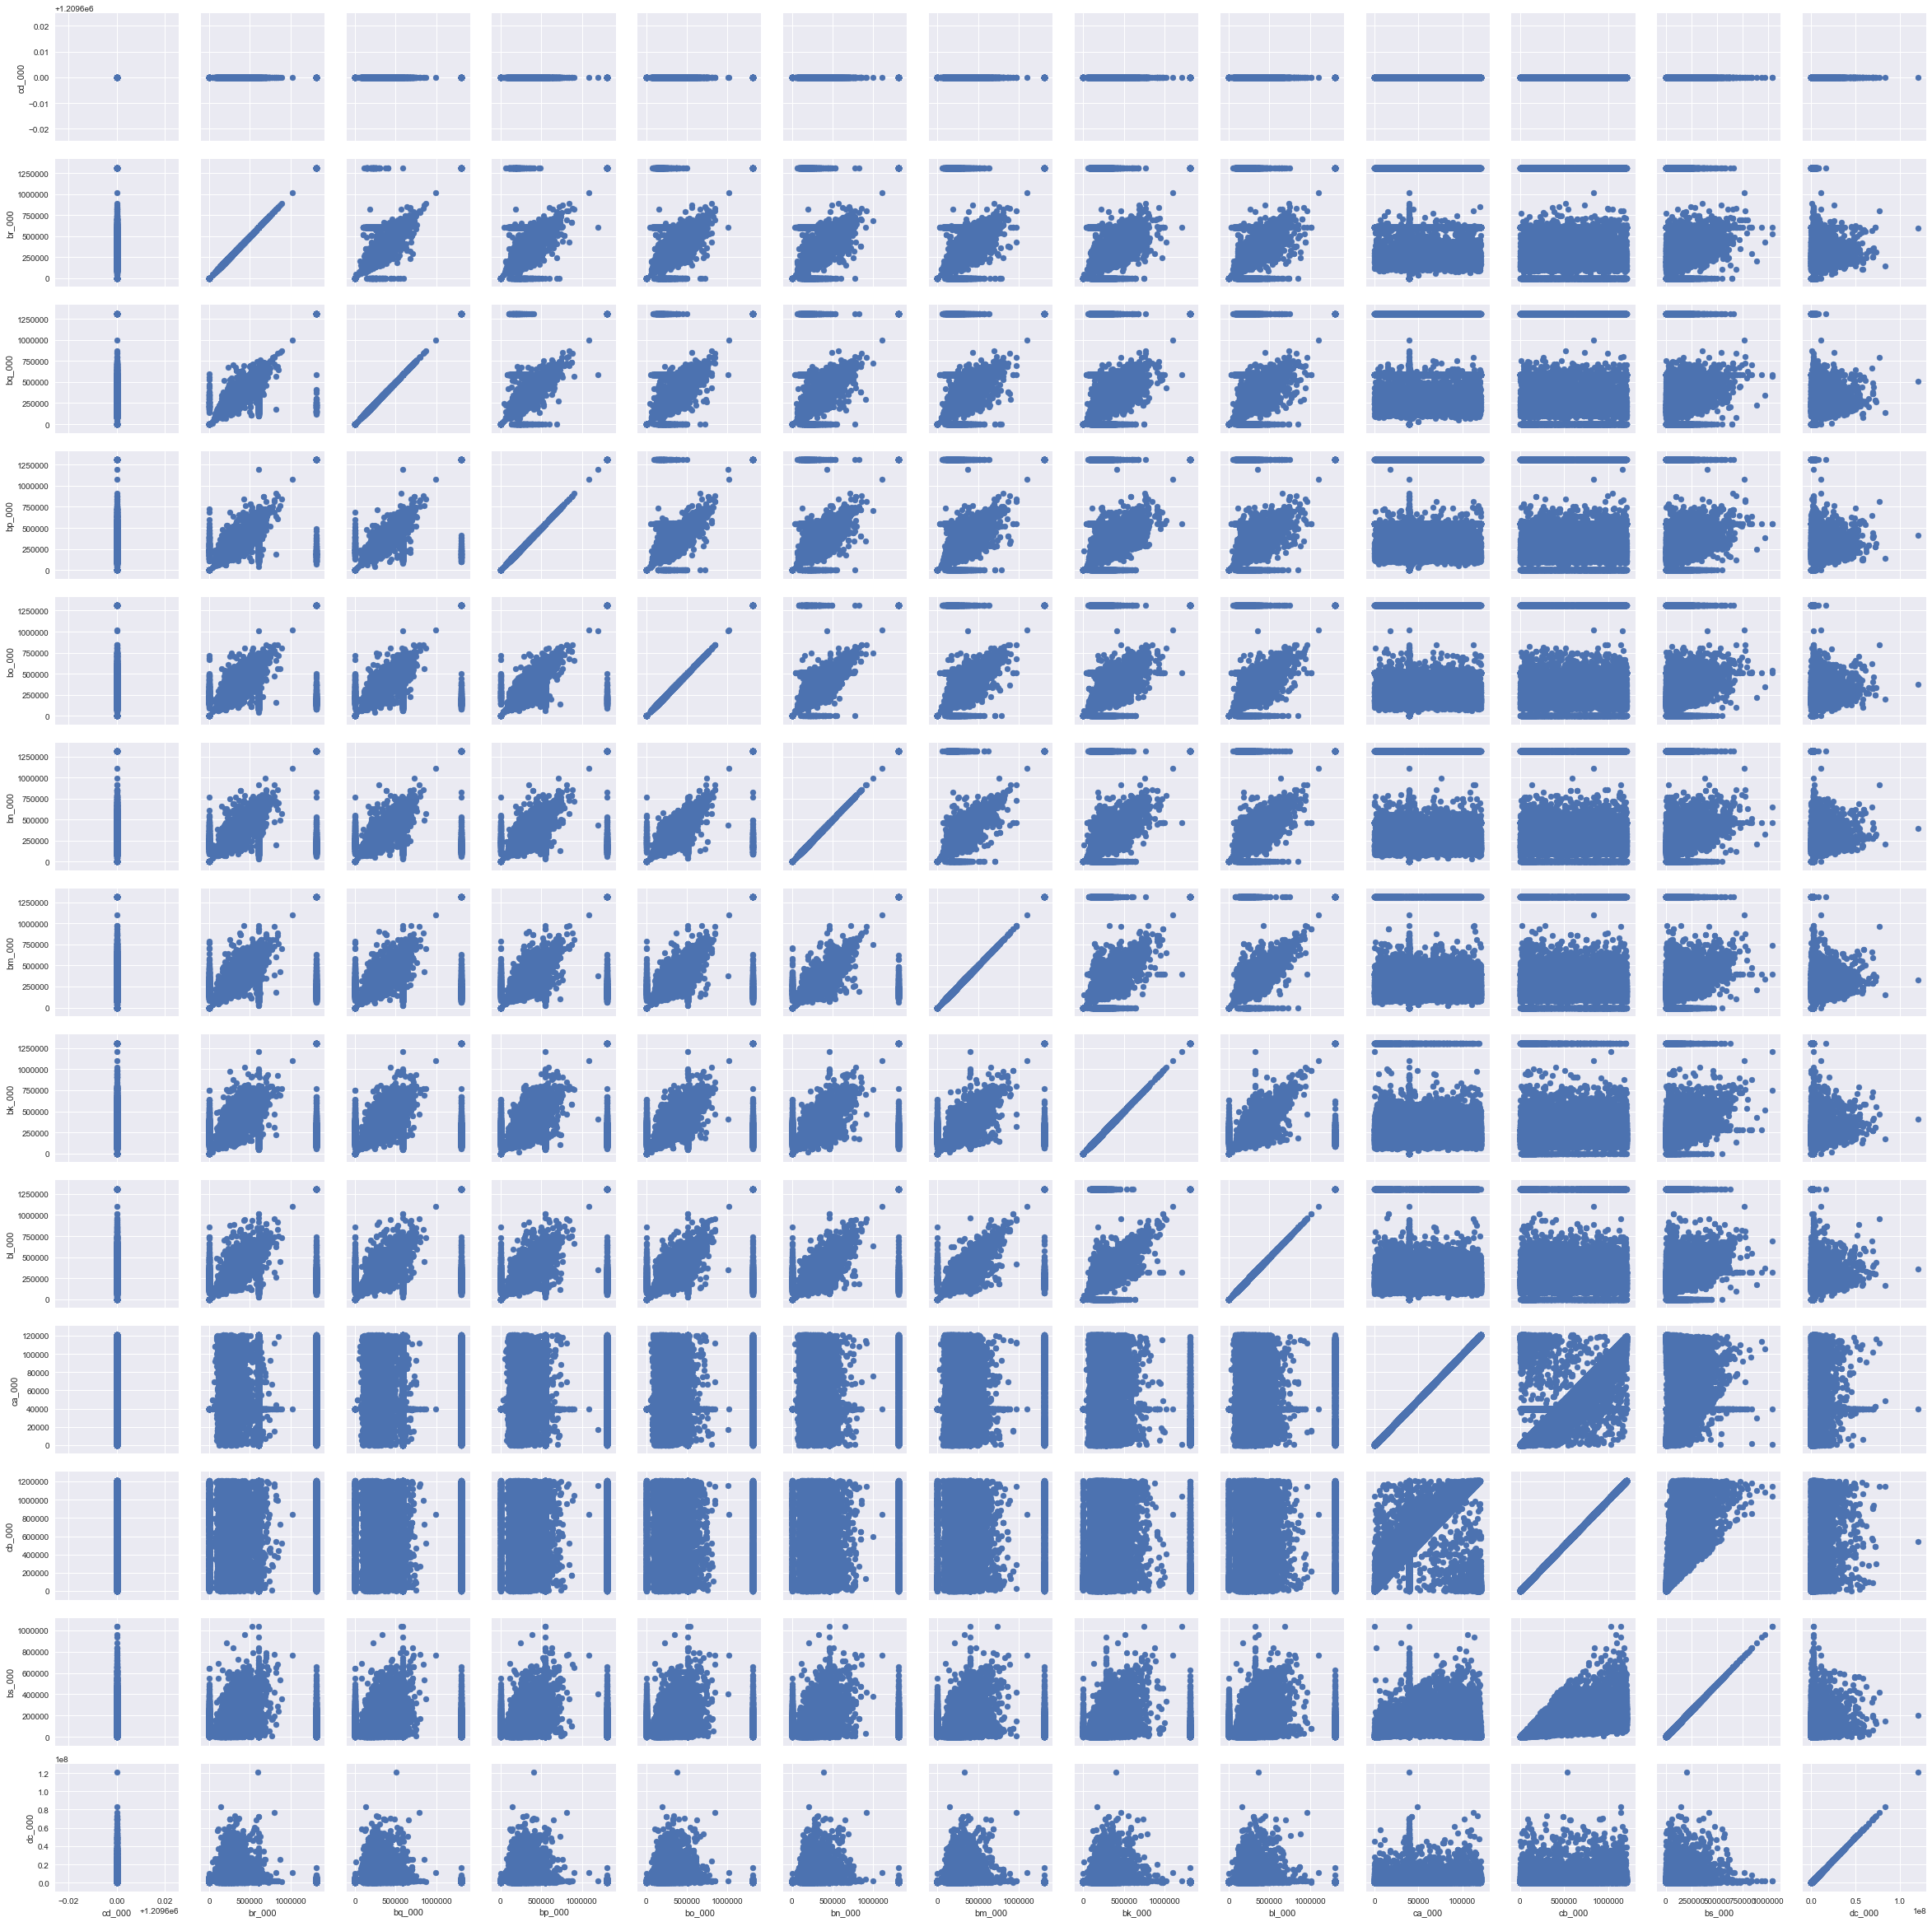

In [197]:
g = sns.PairGrid(training_dataframe, vars=columns_highest_cv)
g = g.map(plt.scatter)

In the below code making box plots for the features with highest CV.

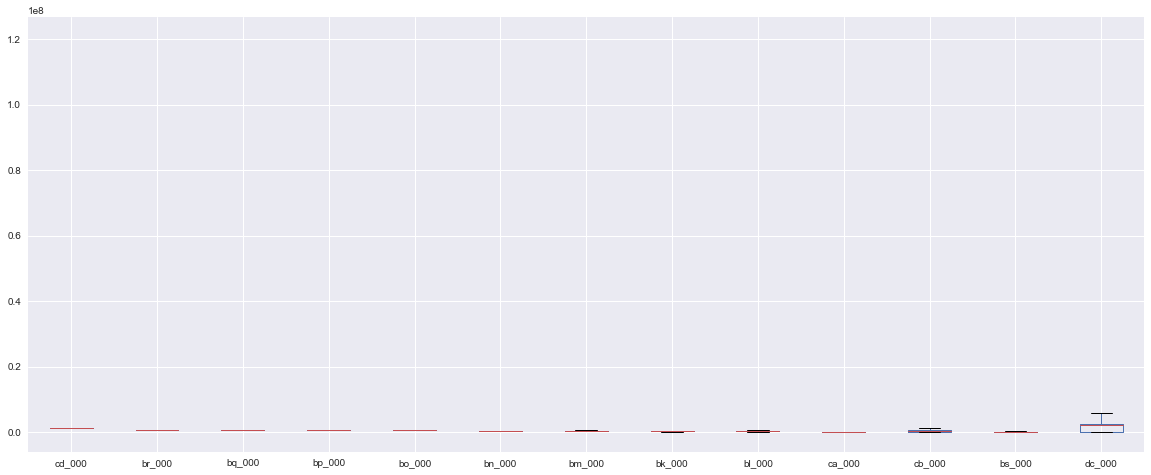

In [199]:
training_dataframe[columns_highest_cv].plot(kind='box', figsize=[20,8])

Box plots using matplotlib and subplots

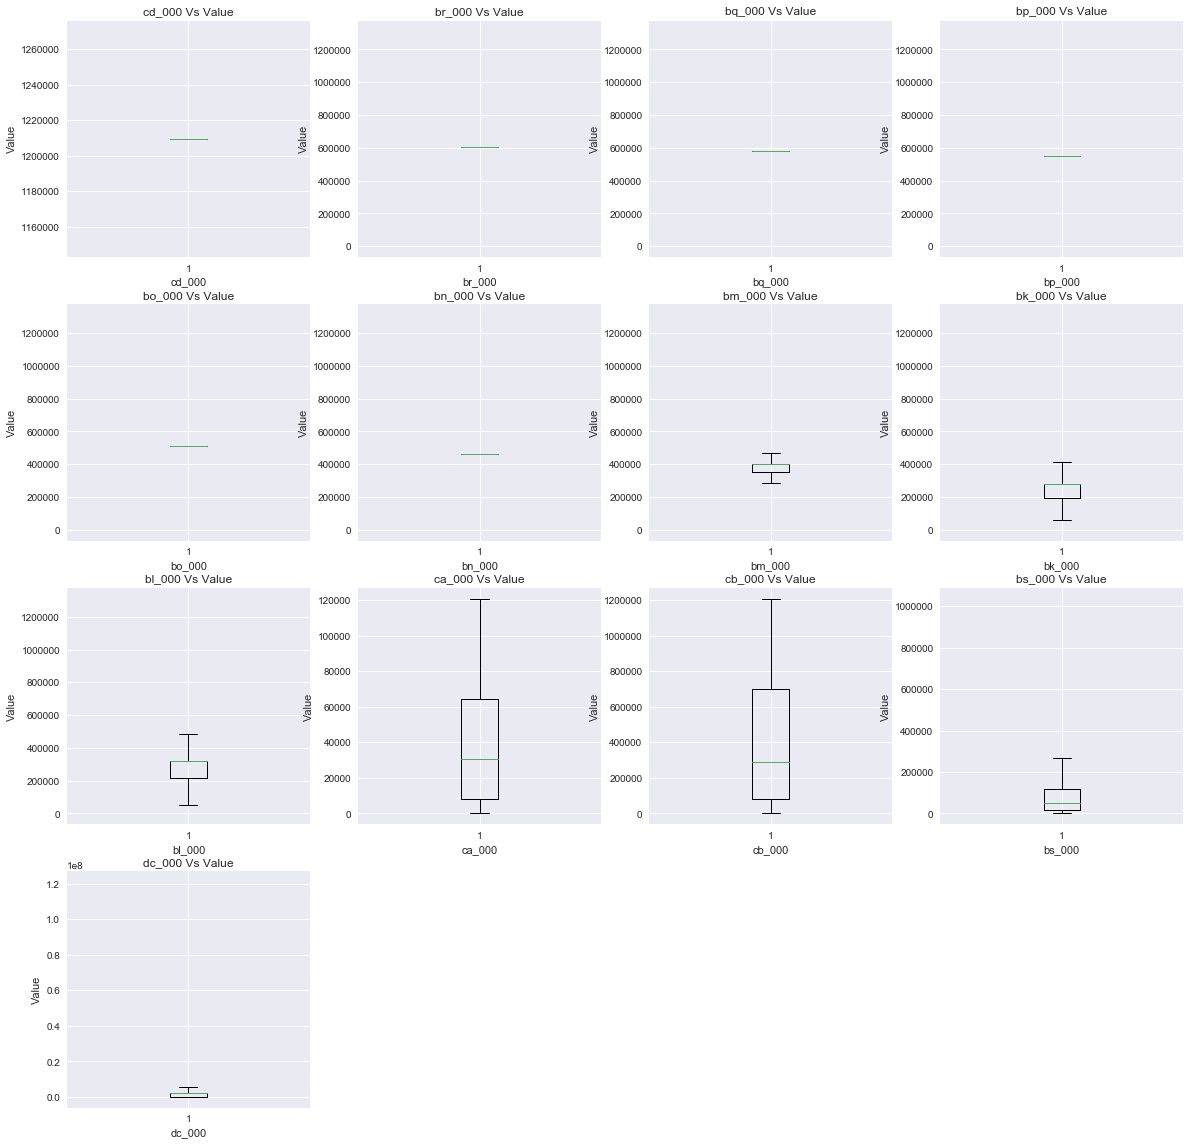

In [200]:
plt.figure(figsize=(20,20))
i=1
for p in columns_highest_cv:
    plt.subplot(4,4,i)
    plt.boxplot(training_dataframe[p])
#     plt.ylim(training_dataframe[p].min()-2,training_dataframe[p].max()+2)
    plt.xlabel(p)
    plt.ylabel('Value')
    tit = p + " Vs Value"
    plt.title(tit)
    i+=1
plt.show()

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [201]:
class_neg = 0
class_pos = 0
values = training_dataframe_label['class'].tolist()
for i in range(0,len(values)):
    if values[i] == 'neg':
        class_neg+=1
    else:
        class_pos+=1

In [202]:
print(class_neg)
print(class_pos)

59000
1000


As seen the number of positive class is 1000 and the number of negative class is 59000. Hence, there is a great amount of imbalance observed between the two classes.

In the below code replacing the categorical variables with dummies. The negative class is assigned the value '0' and the positive class is assigned the value '1'.

In [203]:
training_dataframe_label.replace({'neg':0,'pos':1},inplace=True)
testing_dataframe_label.replace({'neg':0,'pos':1},inplace=True)

In [204]:
training_dataframe_label.head()

,class
0,0
1,0
2,0
3,0
4,0


In [205]:
testing_dataframe_label.head()

,class
0,0
1,0
2,0
3,0
4,0


(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In the below code using sklearn RandomForestClassifier, setting the attribute oob_score as True to get the out of bag error.

In [208]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(training_dataframe, training_dataframe_label)
predicted = rf.predict(testing_dataframe)
accuracy = accuracy_score(testing_dataframe_label, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
testerror = mean_squared_error(testing_dataframe_label,predicted)
testerror

Out-of-bag score estimate: 0.991
Mean accuracy score: 0.991


0.0093125

Computed the out of bag error and the test error in above code.

In [209]:
train_pred = rf.predict(training_dataframe)
trainerror = mean_squared_error(training_dataframe_label,train_pred)
trainerror

0.0005833333333333334

Computed the train error in the above code.

Below is the code for plotting confusion matrix, the function plotConfusionMatrix() is used to write the code for plotting.

In [212]:
def plotConfusionMatrix(cm):
    class_names = np.array([0,1])

    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Compute confusion matrix
    cnf_matrix = cm
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

In [213]:
cm=confusion_matrix(testing_dataframe_label,predicted)

Below is the confusion matrix for test data. The class 0 represents the neg class and the class 1 represents the positive class. As seen from the confusion matrix for the test data TN = 15603, FN = 22, FP = 127 and TP = 248. Here 34% of positive class is missclassified. Hence we can say there is class imbalance.

Confusion matrix, without normalization
[[15603    22]
 [  127   248]]
Normalized confusion matrix
[[1.   0.  ]
 [0.34 0.66]]


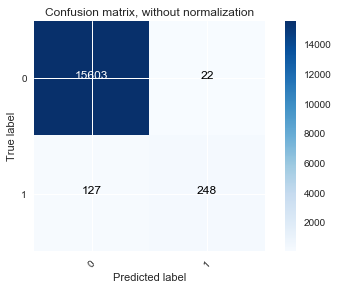

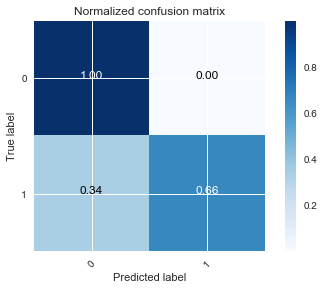

In [215]:
plotConfusionMatrix(cm)

In [219]:
cm_train = confusion_matrix(training_dataframe_label,train_pred)

Below is the confusion matrix for train data. The class 0 represents the neg class and the class 1 represents the positive class. As seen from the confusion matrix for the test data TN = 59000, FN = 0, FP = 35 and TP = 965. Here 4% of positive class is missclassified. Hence we can say that there is no class imbalance as 4% is very less and can be considered noise error.

Confusion matrix, without normalization
[[59000     0]
 [   35   965]]
Normalized confusion matrix
[[1.   0.  ]
 [0.04 0.96]]


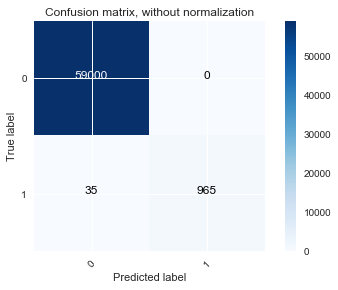

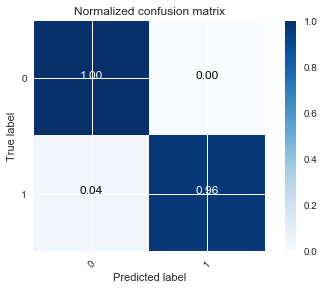

In [220]:
plotConfusionMatrix(cm_train)

Below is the function for plotting ROC and AUC.

In [221]:
def plotROC(train_dfs,train_label,model):
    actual = train_label.values.T.tolist()
    actual = actual[0]
    pred_lst = predicted.tolist()

    probs = model.predict_proba(train_dfs)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(train_label, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Plotting ROC curve and calculating AUC for train data. Since the train error is almost equivalent to zero AUC is 100%

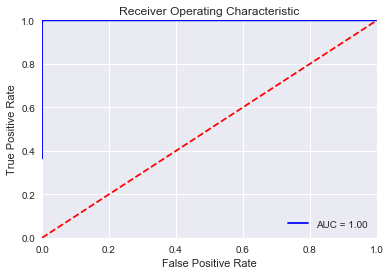

In [222]:
plotROC(training_dataframe,training_dataframe_label,rf)

Plotting ROC and calculating AUC for test data. The AUC for test data is 97%.

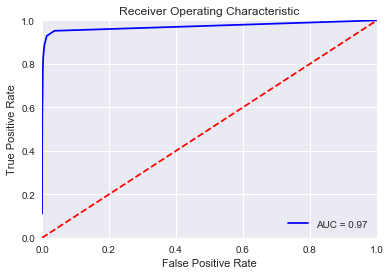

In [223]:
plotROC(testing_dataframe,testing_dataframe_label,rf)

In [224]:
oob_error = 1-rf.oob_score_
oob_error

0.008950000000000014

In [225]:
testerror

0.0093125

In [235]:
tn=cm[0][0]
fn=cm[0][1]
fp=cm[1][0]
tp=cm[1][1]

In [240]:
te = (fn+fp)/(tn+fn+fp+tp)
te

0.0005833333333333334

The test error for random forest is 0.0005833333333333334 and out of bag error is 0.008950000000000014. Hence if we compare we can say that the test error is less than out of bag error.

In [286]:
from sklearn.metrics import classification_report
print("Classification report for training data")
print(classification_report(training_dataframe_label, train_pred))
print("\n")
print("Classification report for testing data")
print(classification_report(testing_dataframe_label, predicted))

Classification report for training data
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     59000
          1       1.00      0.96      0.98      1000

avg / total       1.00      1.00      1.00     60000



Classification report for testing data
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     15625
          1       0.92      0.66      0.77       375

avg / total       0.99      0.99      0.99     16000



As seen there is no misclassification in the training data, but there is an 8% missclassification of class '1' in the testing data.

(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

Class imbalance can be handled by undersampling or oversampling. There are many techniques available to do this. Here i a using undersampling. Nearmiss pipeline will be used for undersampling.

In [251]:
classifier = RandomForestClassifier(oob_score=True)
nearmiss_pipeline=make_pipeline_imb(NearMiss(random_state=42),classifier)
nearmiss_model=nearmiss_pipeline.fit(training_dataframe,training_dataframe_label)
nearmiss_pred= nearmiss_model.predict(testing_dataframe)
testerror_nearmiss=mean_squared_error(testing_dataframe_label,nearmiss_pred)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {testerror_nearmiss:.3}')

Out-of-bag score estimate: 0.991
Mean accuracy score: 0.617


In [249]:
nearmiss_prediction_train=nearmiss_model.predict(training_dataframe)

Confusion matrix, without normalization
[[ 4646 10979]
 [    1   374]]
Normalized confusion matrix
[[0.3 0.7]
 [0.  1. ]]


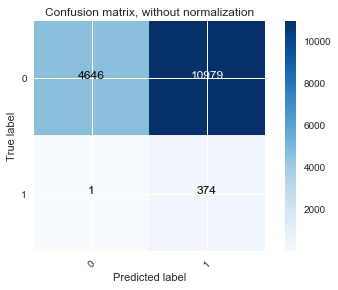

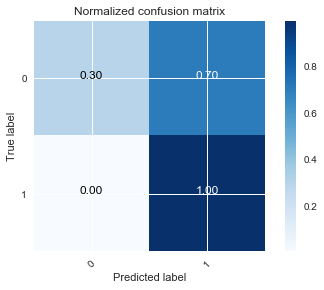

Confusion matrix, without normalization
[[17638 41362]
 [    2   998]]
Normalized confusion matrix
[[0.3 0.7]
 [0.  1. ]]


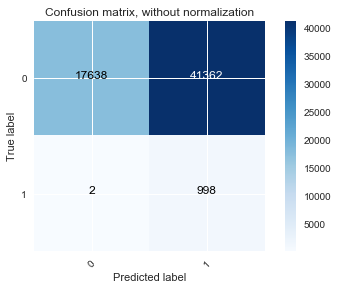

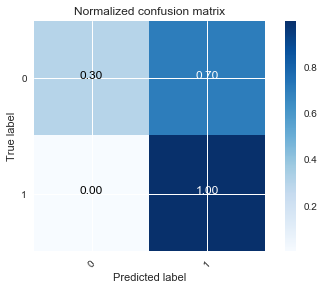

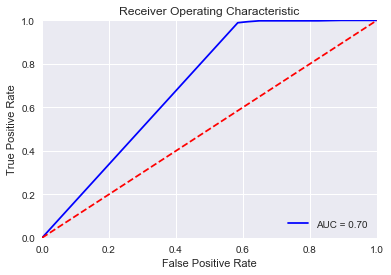

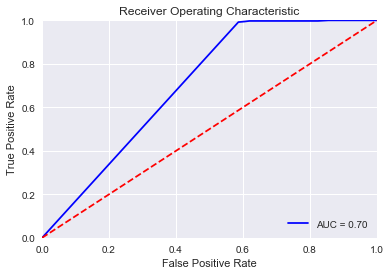

In [250]:
cm_nr=confusion_matrix(testing_dataframe_label,nearmiss_pred)
cm_train_nr = confusion_matrix(training_dataframe_label,nearmiss_prediction_train)
plotConfusionMatrix(cm_nr)
plotConfusionMatrix(cm_train_nr)
plotROC(training_dataframe,training_dataframe_label,nearmiss_model)
plotROC(testing_dataframe,testing_dataframe_label,nearmiss_model)

The mean squared error is reduced after undersampling as compared to question 2c. MSE using random forest classifier = 0.991 and MSE after undersampling using nearmiss = 0.617

(e) Model Trees
In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has  j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.
One of the methods that can be used at each node is Logistic Regression. One can use scikit learn to call Weka to train Logistic Model Trees for classification. Train Logistic Model Trees for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [256]:
new_train = pd.concat([training_dataframe_label,training_dataframe],axis=1)
new_test = pd.concat([testing_dataframe_label,testing_dataframe],axis=1)

Training a subset of data, since the complete data was taking a long time.

In [301]:
new_test_reduced = new_test[8000:9000]
new_train_reduced = new_train[55000:60000]

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/anaconda3/lib/python3.6/site-packages/javabridge/jars/rhino-1.7R4.jar', '/anaconda3/lib/python3.6/site-packages/javabridge/jars/runnablequeue.jar', '/anaconda3/lib/python3.6/site-packages/javabridge/jars/cpython.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar', '/anaconda3/lib/python3.6/site-pac

Cross Validation Results

Correctly Classified Instances        4943               98.86   %
Incorrectly Classified Instances        57                1.14   %
Kappa statistic                          0.5233
Mean absolute error                      0.0149
Root mean squared error                  0.0966
Relative absolute error                 53.6808 %
Root relative squared error             82.1787 %
Total Number of Instances             5000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.996    0.543    0.992      0.996    0.994      0.530    0.965     0.999     0
                 0.457    0.004    0.627      0.457    0.529      0.530    0.965     0.553     1
Weighted Avg.    0.989    0.535    0.987      0.989    0.988      0.530    0.965     0.993     



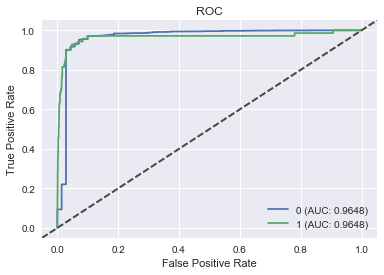

In [302]:
import weka.core.jvm as jvm
import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.classifiers import FilteredClassifier
import weka.plot.graph as graph
from weka.classifiers import Classifier
from weka.filters import Filter
import weka.plot.classifiers as plcls 
from weka.classifiers import PredictionOutput, KernelClassifier, Kernel
from weka.classifiers import GridSearch
from weka.core.classes import ListParameter, MathParameter
import weka.core.converters
from weka.experiments import Tester, ResultMatrix

jvm.stop()
jvm.start()

train_weka = converters.ndarray_to_instances(new_train_reduced.values.copy(order = 'C'),relation = 'tree')
train_weka.class_is_first()

cl_train = Filter(classname = "weka.filters.unsupervised.attribute.NumericToNominal",options=["-R","first"])
cl_train.inputformat(train_weka)
train_weka = cl_train.filter(train_weka)

test_weka = converters.ndarray_to_instances(new_test_reduced.values.copy(order = 'C'),relation = 'tree')
test_weka.class_is_first()

cl_test = Filter(classname = "weka.filters.unsupervised.attribute.NumericToNominal",options=["-R","first"])
cl_test.inputformat(test_weka)
test_weka = cl_test.filter(test_weka)

LMT_classifier = Classifier(classname="weka.classifiers.trees.LMT")
LMT_classifier.build_classifier(train_weka)
evaluation_LMT = Evaluation(train_weka)
evaluation_LMT.crossvalidate_model(LMT_classifier,train_weka,5,Random(42))
print('Cross Validation Results')
print(evaluation_LMT.summary())
print(evaluation_LMT.class_details())
plcls.plot_roc(evaluation_LMT, class_index=[0, 1], wait=True)

The AUC for class '0' is 96.48% and for class '1' is also 96.48%. The root mean squared error for LMT is 0.0966

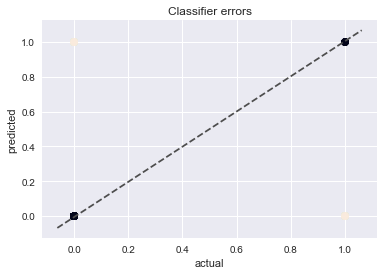

In [303]:
import weka.plot.classifiers as plcls  # NB: matplotlib is required
plcls.plot_classifier_errors(evaluation_LMT.predictions, wait=True)

(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.

In the below code using SMOTE to oversample the training data. 

In [304]:
from imblearn.over_sampling import SMOTE

dls = np.split(new_train_reduced,[1],axis = 1)
# build model with SMOTE imblearn
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(dls[1], dls[0])


In [309]:
columns_features = dls[1].columns
columns_target = dls[0].columns

In [316]:
tr = pd.DataFrame(x_train_res,columns=columns_features)
tr_l = pd.DataFrame(y_train_res,columns=columns_target)

In [319]:
new_train_smote = pd.concat([tr_l,tr],axis=1)

In the below code refitting the LMT model on the oversampled data.

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/anaconda3/lib/python3.6/site-packages/javabridge/jars/rhino-1.7R4.jar', '/anaconda3/lib/python3.6/site-packages/javabridge/jars/runnablequeue.jar', '/anaconda3/lib/python3.6/site-packages/javabridge/jars/cpython.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar', '/anaconda3/lib/python3.6/site-pac

Cross Validation Results

Correctly Classified Instances        9727               98.6511 %
Incorrectly Classified Instances       133                1.3489 %
Kappa statistic                          0.973 
Mean absolute error                      0.0297
Root mean squared error                  0.1106
Relative absolute error                  5.9363 %
Root relative squared error             22.1275 %
Total Number of Instances             9860     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.987    0.014    0.986      0.987    0.987      0.973    0.997     0.998     0
                 0.986    0.013    0.987      0.986    0.987      0.973    0.997     0.994     1
Weighted Avg.    0.987    0.013    0.987      0.987    0.987      0.973    0.997     0.996     



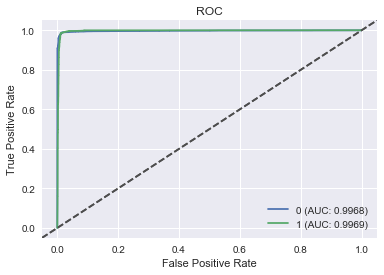

In [321]:
jvm.stop()
jvm.start()

train_weka = converters.ndarray_to_instances(new_train_smote.values.copy(order = 'C'),relation = 'tree')
train_weka.class_is_first()

cl_train = Filter(classname = "weka.filters.unsupervised.attribute.NumericToNominal",options=["-R","first"])
cl_train.inputformat(train_weka)
train_weka = cl_train.filter(train_weka)

# test_weka = converters.ndarray_to_instances(new_test_reduced.values.copy(order = 'C'),relation = 'tree')
# test_weka.class_is_first()

# cl_test = Filter(classname = "weka.filters.unsupervised.attribute.NumericToNominal",options=["-R","first"])
# cl_test.inputformat(test_weka)
# test_weka = cl_test.filter(test_weka)

LMT_classifier = Classifier(classname="weka.classifiers.trees.LMT")
LMT_classifier.build_classifier(train_weka)
evaluation_LMT = Evaluation(train_weka)
evaluation_LMT.crossvalidate_model(LMT_classifier,train_weka,5,Random(42))
print('Cross Validation Results')
print(evaluation_LMT.summary())
print(evaluation_LMT.class_details())
plcls.plot_roc(evaluation_LMT, class_index=[0, 1], wait=True)

As we see after resampling the data the precision has been incresed in both the classes. Earlier the presion for class '1' was 62%, after oversampling using SMOTE the presion has increased to 98.7%. Hence using SMOTE we have handled the imbalance.